In [1]:
from random import randint
help('random.randint')
set?

Help on method randint in random:

random.randint = randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.

Init signature: set(self, /, *args, **kwargs)
Docstring:     
set() -> new empty set object
set(iterable) -> new set object

Build an unordered collection of unique elements.
Type:           type
Subclasses:     


In [2]:
def simulare_probabilitate_aceeasi_zi_de_nastere(n):
    cazuri_succes = 0
    for _ in range(10000):
        lista_random_zile = []
        for i in range(n):
            zi = randint(1,365)
            lista_random_zile.append(zi)
        if len(lista_random_zile) != len(set(lista_random_zile)):
            cazuri_succes +=1
    probabilitate = cazuri_succes / 10000
    return probabilitate

In [3]:
n=26
probabilitate = simulare_probabilitate_aceeasi_zi_de_nastere(n)
print(f"Probabilitatea ca într-un grup de {n} persoane să existe cel puțin două cu aceeași zi de naștere este de {probabilitate:.4f}")

Probabilitatea ca într-un grup de 26 persoane să existe cel puțin două cu aceeași zi de naștere este de 0.6005


In [4]:
def probabilitate_exacta_aceeasi_zi_de_nastere(n):
    if n>=365:
        return 1.0
    probabilitate_zile_diferite = 1.0
    for i in range(n):
        probabilitate_zile_diferite *= (365-i)/365
    probabilitate = 1-probabilitate_zile_diferite #1-complementul
    #sau
    #probabilitate = perm(365,n)/(365**n)
    return probabilitate
        

In [5]:
n=6
probabilitate = probabilitate_exacta_aceeasi_zi_de_nastere(n)
print(f"Probabilitatea ca într-un grup de {n} persoane să existe cel puțin două cu aceeași zi de naștere este de {probabilitate:.4f}")

Probabilitatea ca într-un grup de 6 persoane să existe cel puțin două cu aceeași zi de naștere este de 0.0405


In [6]:
from matplotlib.pyplot import plot, grid, title, show
#help('matplotlib.pyplot.plot')

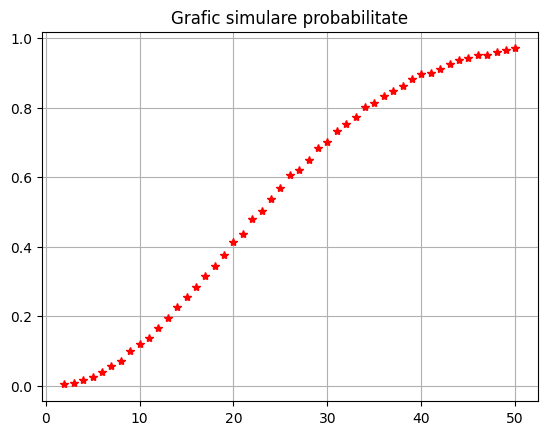

In [10]:
title('Grafic simulare probabilitate')
xs = range(2,51)
ys = [simulare_probabilitate_aceeasi_zi_de_nastere(x) for x in xs]
plot(xs,ys,'r*')
grid()
show()

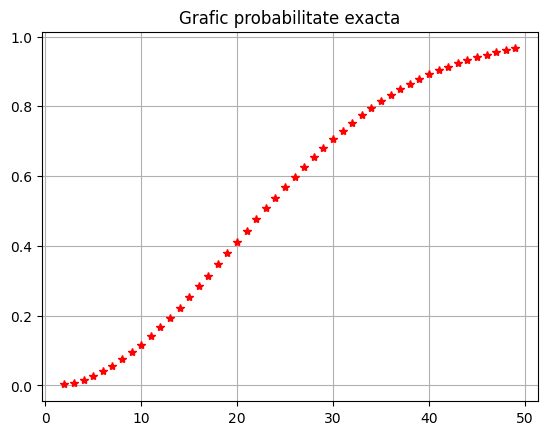

In [9]:
title('Grafic probabilitate exacta')
xs = range(2,51)
ys = [probabilitate_exacta_aceeasi_zi_de_nastere(x) for x in xs]
plot(xs,ys,'r*')
grid()
show()

In [12]:
from matplotlib.pyplot import axis, plot, show
from random import random
from math import dist
help('random.random')
help('math.dist')

Help on built-in function random in random:

random.random = random() method of random.Random instance
    random() -> x in the interval [0, 1).

Help on built-in function dist in math:

math.dist = dist(p, q, /)
    Return the Euclidean distance between two points p and q.

    The points should be specified as sequences (or iterables) of
    coordinates.  Both inputs must have the same dimension.

    Roughly equivalent to:
        sqrt(sum((px - qx) ** 2.0 for px, qx in zip(p, q)))



In [17]:
help('matplotlib.pyplot.axis')

Help on function axis in matplotlib.pyplot:

matplotlib.pyplot.axis = axis(*args, emit=True, **kwargs)
    Convenience method to get or set some axis properties.

    Call signatures::

      xmin, xmax, ymin, ymax = axis()
      xmin, xmax, ymin, ymax = axis([xmin, xmax, ymin, ymax])
      xmin, xmax, ymin, ymax = axis(option)
      xmin, xmax, ymin, ymax = axis(**kwargs)

    Parameters
    ----------
    xmin, xmax, ymin, ymax : float, optional
        The axis limits to be set.  This can also be achieved using ::

            ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

    option : bool or str
        If a bool, turns axis lines and labels on or off. If a string,
        possible values are:

        ======== ==========================================================
        Value    Description
        ======== ==========================================================
        'on'     Turn on axis lines and labels. Same as ``True``.
        'off'    Turn off axis lines and labe

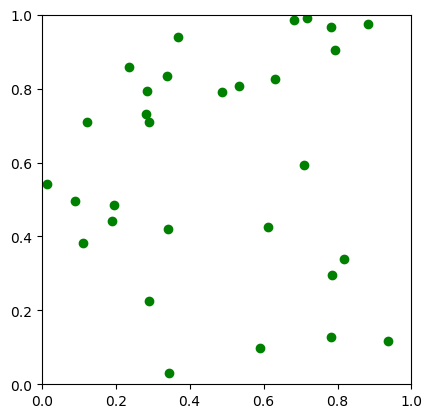

In [19]:
axis('square')
axis((0, 1, 0, 1))
for i in range(30):
    F=[random(),random()]
    plot(F[0],F[1],'go')
show()

In [35]:
def e_in_cercul_circumscris(punct):
    if dist(punct,(0.5,0.5)) < 0.5:
        return True
    return False

def e_mai_aproape_de_centru(punct,centru,varfuri):
    if dist(punct,centru) < dist(punct,varfuri[0]) and dist(punct,centru) < dist(punct,varfuri[1]) and dist(punct,centru) < dist(punct,varfuri[2]) and dist(punct,centru) < dist(punct,varfuri[3]):
        return True
    return False

def e_obtuzunghic(punct, varf1, varf2):
    d1 = dist(punct, varf1)
    d2 = dist(punct, varf2)

    if d1**2 + d2**2 > 1:
        return 1
    return 0
        
def generare_puncte_pentru_caz(n,caz):
    axis('square')
    axis([0, 1, 0, 1])
    centru = (0.5,0.5)
    raza = 0.5
    varfuri = [(0,0),(1,0),(1,1),(0,1)]
    puncte = [(random(),random()) for i in range(n)]
    if caz==1:
        contor = 0
        for punct in puncte:
            if e_in_cercul_circumscris(punct):
                contor+=1
                plot(punct[0], punct[1], 'go')
            else:
                plot(punct[0], punct[1], 'ro')
        frecventa = contor / n * 4
        print(f"Frecventa relativa pentru punctele in interiorul cercului inscris: {frecventa:.4f}")
    elif caz==2:
        contor=0
        for punct in puncte:
            if e_mai_aproape_de_centru(punct,centru,varfuri):
                contor +=1
                apropiate_de_centru.append(punct)
                plot(punct[0], punct[1], 'go')
            else:
                plot(punct[0], punct[1], 'ro')
        frecventa = contor / n
        print(f"Frecventa relativa pentru punctele mai apropiate de centru decat de varfuri: {frecventa:.4f}")
    elif caz==3:
        puncte_asc_obt = []
        for punct in puncte:
            nr_obtuze = e_obtuzunghic(punct,varfuri[0],varfuri[1])+e_obtuzunghic(punct,varfuri[0],varfuri[3])+e_obtuzunghic(punct,varfuri[2],varfuri[1])+e_obtuzunghic(punct,varfuri[2],varfuri[3])
            if nr_obtuze == 2:
                puncte_asc_obt.append(punct)
                plot(punct[0], punct[1], 'go')
            else:
                plot(punct[0], punct[1], 'ro')
        frecventa = len(puncte_asc_obt) / n
        print(f"Frecventa relativa pentru punctele care formeaza doua triunghiurui ascutitunghice si doua obtuzunghice: {frecventa:.4f}")
    show()

Frecventa relativa pentru punctele in interiorul cercului inscris: 3.1440


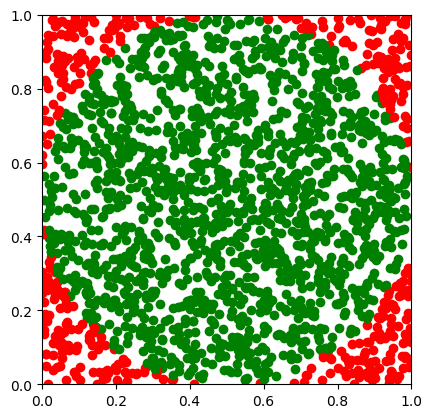

In [36]:
generare_puncte_pentru_caz(2000,1)

Frecventa relativa pentru punctele mai apropiate de centru decat de varfuri: 0.4990


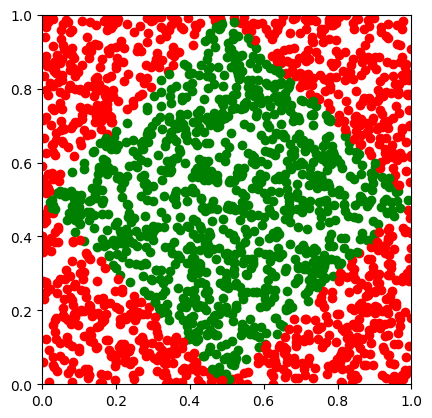

In [24]:
generare_puncte_pentru_caz(2000,2)

Frecventa relativa pentru punctele care formeaza doua triunghiurui ascutitunghice si doua obtuzunghice: 0.5630


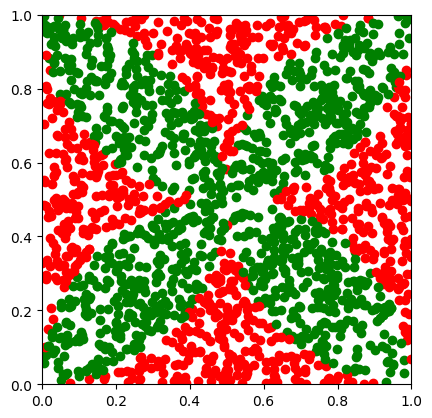

In [38]:
generare_puncte_pentru_caz(2000,3)